In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# -------------------------------------------------The XOR Problem-------------------------------------------------
# Why XOR?
# XOR (exclusive or) is a simple logical operation:

# If inputs are different → output 1
# If inputs are the same → output 0
# Input A	Input B	Output
# 0	            0	0
# 0	            1	1
# 1	            0	1
# 1	            1	0
# The Historical Importance
# In 1969, Minsky and Papert proved that a single-layer perceptron (one neuron) cannot learn XOR. This caused the first "AI Winter" — people thought neural networks were fundamentally limited.

# The solution? Hidden layers. A network with at least one hidden layer CAN learn XOR. This notebook proves it.

In [4]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])
print(f"x--\n {X} \n estimated y--\n {y}")

x--
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 
 estimated y--
 [[0]
 [1]
 [1]
 [0]]


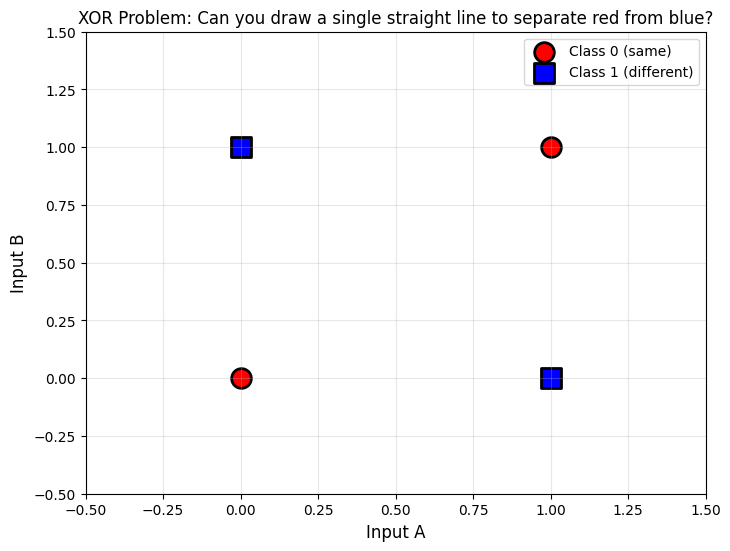


 A single straight line CANNOT separate these classes.
This is why we need hidden layers — they create non-linear boundaries.


In [5]:
plt.figure(figsize=(8, 6))

# Plot the points
for i in range(len(X)):
    color = 'red' if y[i][0] == 0 else 'blue'
    marker = 'o' if y[i][0] == 0 else 's'
    plt.scatter(X[i][0], X[i][1], c=color, s=200, marker=marker,
                edgecolors='black', linewidths=2)

plt.xlabel('Input A', fontsize=12)
plt.ylabel('Input B', fontsize=12)
plt.title('XOR Problem: Can you draw a single straight line to separate red from blue?',
          fontsize=12)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True, alpha=0.3)
plt.legend(['Class 0 (same)', 'Class 1 (different)'], loc='upper right')
plt.show()

print("\n A single straight line CANNOT separate these classes.")
print("This is why we need hidden layers — they create non-linear boundaries.")

In [6]:
# ---------------------------------------------Building the Neural Networt---------------------------------------

# Architecture ---> Input Layer (2 neurons) → Hidden Layer (4 neurons) → Output Layer (1 neuron)

# Input: 2 values (the two XOR inputs)
# Hidden: 4 neurons with sigmoid activation
# Output: 1 neuron with sigmoid activation (gives us 0-1 probability)



# Network architecture
INPUT_SIZE = 2    # Two inputs (A and B)
HIDDEN_SIZE = 4   # Four neurons in hidden layer
OUTPUT_SIZE = 1   # One output (0 or 1)




In [13]:
# Weights from input to hidden layer (2 inputs → 4 hidden neurons)
weights_input_hidden = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.5
bias_hidden = np.zeros((1, HIDDEN_SIZE)) #--->[0,0,0,0]

print(f"weights_input_hidden -- {weights_input_hidden}")
print(f"bias_hidden -- {bias_hidden}")

weights_input_hidden -- [[ 0.46853067 -0.43841381  0.43952454  0.57497007]
 [ 0.30846768  0.47139983  0.78164219  0.68337933]]
bias_hidden -- [[0. 0. 0. 0.]]


In [14]:
# Weights from hidden to output layer (4 hidden neurons → 1 output)
weights_hidden_output = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.5
bias_output = np.zeros((1, OUTPUT_SIZE))

In [15]:
print("Network initialized with random weights:")
print(f"  Input → Hidden weights shape: {weights_input_hidden.shape}")
print(f"  Hidden → Output weights shape: {weights_hidden_output.shape}")
print(f"\nTotal parameters: {weights_input_hidden.size + bias_hidden.size + weights_hidden_output.size + bias_output.size}")

Network initialized with random weights:
  Input → Hidden weights shape: (2, 4)
  Hidden → Output weights shape: (4, 1)

Total parameters: 17


In [ ]:
# The Activation Function: Sigmoid
# Sigmoid squashes any number into the range (0, 1):

# Large positive numbers → close to 1
# Large negative numbers → close to 0
# Zero → exactly 0.5
# We also need its derivative for backpropagation.